In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
x_train = (x_train/255).reshape(-1, 28*28)
x_test = (x_test/255).reshape(-1, 28*28)

In [3]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input

In [4]:
input = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input)     # 이게 오토인코더에서 피처 추출 역할을 한다
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [5]:
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, validation_split=0.2)
encoded_imgs = autoencoder.predict(x_test)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 1s 26us/sample - loss: 0.0771 - val_loss: 0.0443
Epoch 2/50
48000/48000 [==============================] - 1s 13us/sample - loss: 0.0375 - val_loss: 0.0324
Epoch 3/50
48000/48000 [==============================] - 1s 13us/sample - loss: 0.0295 - val_loss: 0.0265
Epoch 4/50
48000/48000 [==============================] - 1s 13us/sample - loss: 0.0246 - val_loss: 0.0226
Epoch 5/50
48000/48000 [==============================] - 1s 13us/sample - loss: 0.0213 - val_loss: 0.0198
Epoch 6/50
48000/48000 [==============================] - 1s 13us/sample - loss: 0.0188 - val_loss: 0.0177
Epoch 7/50
48000/48000 [==============================] - 1s 13us/sample - loss: 0.0169 - val_loss: 0.0159
Epoch 8/50
48000/48000 [==============================] - 1s 13us/sample - loss: 0.0153 - val_loss: 0.0146
Epoch 9/50
48000/48000 [==============================] - 1s 13us/sample - loss: 0.0141 - val_

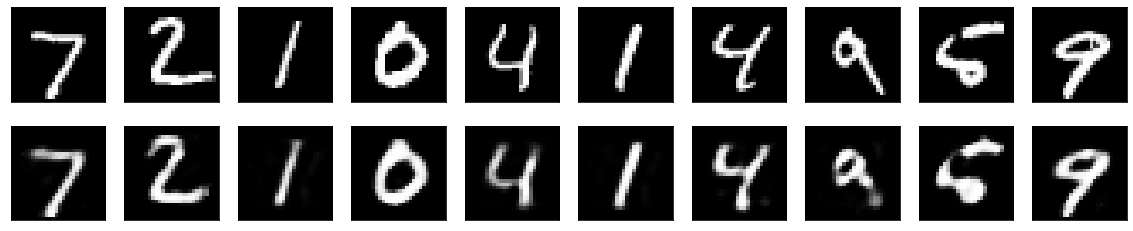

In [6]:
# matplotlib 은 넘나 여러방식이 있어서 제일 간단한 내 방식으로 엑셀정리 해놔야할 필요성을 많이 느낀다.
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(encoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [7]:
# PCA를 보자

import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_diabetes

In [8]:
dataset = load_diabetes()

x = dataset.data
y = dataset.target

pca = PCA(n_components=5)
x2 = pca.fit_transform(x)
pca_evr = pca.explained_variance_ratio_  # 압축한 컬럼별 중요비율
print(pca_evr)
print(sum(pca_evr))  # 0.83 -> pca(10 -> 5칼럼으로 압축)해서 중요한 0.17은 소실했다

[0.40242142 0.14923182 0.12059623 0.09554764 0.06621856]
0.8340156689459766


In [18]:
pca = PCA()
pca.fit(x)
cumsum = np.cumsum(pca.explained_variance_ratio_)  # '순서대로'의 누적합을 눈으로 확인할 수 있음 
print(cumsum)

n_components = np.argmax(cumsum >= 0.99)+1  # argmax가 어찌 돌아가는지는 찍어봐야 알듯.. 제일 큰거 아니었어..?
print(cumsum>=0.99)
print(n_components)

[0.40242142 0.55165324 0.67224947 0.76779711 0.83401567 0.89428759
 0.94794364 0.99131196 0.99914395 1.        ]
[False False False False False False False  True  True  True]
8


In [11]:
type(cumsum)

numpy.ndarray

In [12]:
cumsum  # 이렇게 눈으로 볼 수 있음

array([0.40242142, 0.55165324, 0.67224947, 0.76779711, 0.83401567,
       0.89428759, 0.94794364, 0.99131196, 0.99914395, 1.        ])

In [17]:
np.argmax([0,1,2,3,4,5]) # argmax는 가장 큰 i를 보여주는 것이 맞았지만,

5

In [16]:
np.argmax(np.array([0,1,2,3,4,5])) # 심지어 np.array를 시켜도 똑같았지만,

5

In [15]:
np.argmax(np.array([0,1,2,3,4,5]) >= 3) # >= 기호를 넣는 순간,, 왠일인지 제일 작은 i를 (처음 조건에 걸리는 i일수도..) 보여주었다..

3

In [ ]:
# mnist에 적용해보면, 700대 칼럼임(이미지니까)

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [25]:
x_train = (x_train/255).reshape(-1, 28*28)
x_test = (x_test/255).reshape(-1, 28*28) 
'''
음,, pca도 여전히 2차원에서만 사용 가능하네..? 이 부분을 대체 왜 아직도 이렇게 불편하게 냅둔건지 이해하지 못했다 아직 ㅠ
'''

'\n음,, pca도 여전히 2차원에서만 사용 가능하네..? 이 부분을 대체 왜 아직도 이렇게 불편하게 냅둔건지 이해하지 못했다 아직 ㅠ\n'

In [26]:
x = np.append(x_train, x_test, axis=0)
# 전처리는 합쳐서 진행한다 (적용하는 대상데이터가 변동하면 안되는 문제라서) -> 앞으로 모델링할때도 명심할 것
print(x.shape)  # (70000, 784)

(70000, 784)


In [27]:
pca = PCA()
pca.fit(x)
cumsum = np.cumsum(pca.explained_variance_ratio_)
print(cumsum)

[0.09746116 0.16901561 0.23051091 0.28454476 0.3334341  0.37648637
 0.40926898 0.4381654  0.46574904 0.48917044 0.51023733 0.53061286
 0.5476835  0.5646237  0.58045752 0.59532097 0.60851456 0.6213047
 0.63317742 0.64470679 0.65536719 0.66546513 0.67505665 0.684153
 0.69298586 0.70137405 0.70947236 0.71732954 0.72473217 0.73163231
 0.73819375 0.74464845 0.75065664 0.75651276 0.7621803  0.767615
 0.77266217 0.77753297 0.78232252 0.78699846 0.79154214 0.79599132
 0.80017349 0.80413513 0.8079722  0.81173005 0.81534432 0.81883456
 0.82222188 0.82541884 0.82858738 0.83168883 0.83465363 0.83752465
 0.84034978 0.84304401 0.84572793 0.84829303 0.85082471 0.85327119
 0.85566821 0.85805402 0.86034636 0.86255585 0.86468645 0.86674963
 0.86877744 0.87072779 0.8726425  0.87452799 0.87639775 0.8781988
 0.87996667 0.88170025 0.88334875 0.88498112 0.8865952  0.88813824
 0.88960844 0.89103044 0.8924406  0.89384206 0.89523811 0.89658836
 0.89791207 0.899231   0.90052297 0.90177469 0.90299999 0.90420418
 

In [28]:
n_components = np.argmax(cumsum >= 0.99)+1
print(n_components)

331


In [29]:
pca = PCA(n_components=n_components)
pca.fit(x)
x = pca.transform(x)

In [30]:
x_train = x[:60000,:]
x_test = x[60000:,:]

In [34]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
model = Sequential()
model.add(Dense(100, input_dim=(n_components)))   # 첫번째 노드가 100 일때
model.add(Dense(120))
model.add(Dense(80))
model.add(Dense(32))
model.add(Dense(10, activation='softmax')) 
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               33200     
_________________________________________________________________
dense_7 (Dense)              (None, 120)               12120     
_________________________________________________________________
dense_8 (Dense)              (None, 80)                9680      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2592      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                330       
Total params: 57,922
Trainable params: 57,922
Non-trainable params: 0
_________________________________________________________________


In [37]:
#3. 설명한 후 훈련
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc']) 

model.fit(x_train,y_train, epochs=10, batch_size=50)  # 정리할때는 epoch 10번 이상 하지 말기

#4. 평가와 예측
loss, acc = model.evaluate(x_test,y_test) 
print('loss 는',loss)
print('acc 는',acc)

predict = model.predict(x_test)
print(np.argmax(predict, axis = 1))

Epoch 1/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.2870 - acc: 0.9198
Epoch 2/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.2840 - acc: 0.9200
Epoch 3/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.2811 - acc: 0.9205
Epoch 4/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.2819 - acc: 0.9212
Epoch 5/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.2805 - acc: 0.9206
Epoch 6/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.2787 - acc: 0.9213
Epoch 7/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.2779 - acc: 0.9214
Epoch 8/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.2763 - acc: 0.9226
Epoch 9/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.2760 - acc: 0.9223
Epoch 10/10
10000/10000 [==============================] - 0s 43us/step
loss 는 0.29365944241583347
a

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
model = Sequential()
model.add(Dense(30, input_dim=(n_components)))   # 첫번째 노드가 30 일때 (배운것 상으로는 성능 안좋아져야됨)
model.add(Dense(400))
model.add(Dense(100))
model.add(Dense(32))
model.add(Dense(10, activation='softmax')) 
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 30)                9960      
_________________________________________________________________
dense_17 (Dense)             (None, 400)               12400     
_________________________________________________________________
dense_18 (Dense)             (None, 100)               40100     
_________________________________________________________________
dense_19 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                330       
Total params: 66,022
Trainable params: 66,022
Non-trainable params: 0
_________________________________________________________________


In [41]:
#3. 설명한 후 훈련
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc']) 

model.fit(x_train,y_train, epochs=10, batch_size=50)

#4. 평가와 예측
loss, acc = model.evaluate(x_test,y_test) 
print('loss 는',loss)
print('acc 는',acc)

predict = model.predict(x_test)
print(np.argmax(predict, axis = 1))

Epoch 1/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.3955 - acc: 0.8827
Epoch 2/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.3209 - acc: 0.9087
Epoch 3/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.3103 - acc: 0.9113
Epoch 4/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.3024 - acc: 0.9144
Epoch 5/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.2995 - acc: 0.9158
Epoch 6/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.2960 - acc: 0.9165
Epoch 7/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.2935 - acc: 0.9165
Epoch 8/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.2909 - acc: 0.9183
Epoch 9/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.2879 - acc: 0.9199
Epoch 10/10
10000/10000 [==============================] - 0s 41us/step
loss 는 0.2919033525198698
ac

In [46]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = (x_train/255).reshape(-1, 28*28)
x_test = (x_test/255).reshape(-1, 28*28)

In [47]:
def autoencoder(hidden_layer_size) :
    model = Sequential()
    model.add(Dense(units=hidden_layer_size, input_shape=(784,), activation='relu'))
    model.add(Dense(units=784, activation='sigmoid'))
    return model

model = autoencoder(hidden_layer_size=n_components)

model.compile(optimizer='adam', loss='mse', metrics=['acc']) 
model.fit(x_train, x_train, epochs=10)

output = model.predict(x_test)

Epoch 1/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0112 - acc: 0.0128
Epoch 2/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.0023 - acc: 0.0147
Epoch 3/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0017 - acc: 0.0158
Epoch 4/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0014 - acc: 0.0169
Epoch 5/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0012 - acc: 0.0183
Epoch 6/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.0011 - acc: 0.0183
Epoch 7/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0010 - acc: 0.0195
Epoch 8/10
60000/60000 [==============================] - 4s 66us/step - loss: 9.8186e-04 - acc: 0.0195
Epoch 9/10
60000/60000 [==============================] - 4s 66us/step - loss: 9.3866e-04 - acc: 0.0198
Epoch 10/10
60000/60000 [==============================] - 4s 67us/step - loss: 9.0181e-04 -

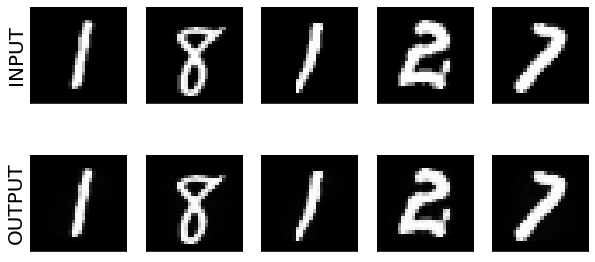

In [53]:
from matplotlib import pyplot as plt
import random
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(10, 5))

# 이미지 다섯 개를 무작위로 고른다. 
random_images = random.sample(range(output.shape[0]), 5)

# 원본(입력) 이미지를 맨 위에 그린다.
for i, ax in enumerate([ax1, ax2, ax3, ax4, ax5]):
    ax.imshow(x_test[random_images[i]].reshape(28, 28))
    if i ==0 : 
        ax.set_ylabel("INPUT", size=20)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

# 오토 인코더가 출력한 이미지를 아래에 그린다.
for i, ax in enumerate([ax6, ax7, ax8, ax9, ax10]):
    ax.imshow(output[random_images[i]].reshape(28,28))
    if i ==0 : 
        ax.set_ylabel("OUTPUT", size=20)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

In [55]:
def autoencoder(hidden_layer_size) :
    model = Sequential()
    model.add(Dense(units=hidden_layer_size, input_shape=(784,), activation='relu'))
    model.add(Dense(units=784, activation='sigmoid'))
    return model

model_01 = autoencoder(hidden_layer_size=10)
model_02 = autoencoder(hidden_layer_size=50)
model_03 = autoencoder(hidden_layer_size=100)
model_04 = autoencoder(hidden_layer_size=330)
model_05 = autoencoder(hidden_layer_size=550)

model_01.compile(optimizer='adam', loss='mse', metrics=['acc'])
model_01.fit(x_train, x_train, epochs=10)
print('size=10 끝')
model_02.compile(optimizer='adam', loss='mse', metrics=['acc'])
model_02.fit(x_train, x_train, epochs=10)
print('size=50 끝')
model_03.compile(optimizer='adam', loss='mse', metrics=['acc'])
model_03.fit(x_train, x_train, epochs=10)
print('size=100 끝')
model_04.compile(optimizer='adam', loss='mse', metrics=['acc'])
model_04.fit(x_train, x_train, epochs=10)
print('size=330 끝')
model_05.compile(optimizer='adam', loss='mse', metrics=['acc'])
model_05.fit(x_train, x_train, epochs=10)
print('size=550 끝')

output_01 = model_01.predict(x_test)
output_02 = model_02.predict(x_test)
output_03 = model_03.predict(x_test)
output_04 = model_04.predict(x_test)
output_05 = model_05.predict(x_test)

Epoch 1/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0482 - acc: 0.0111
Epoch 2/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.0335 - acc: 0.0116
Epoch 3/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.0319 - acc: 0.0113
Epoch 4/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0311 - acc: 0.0107
Epoch 5/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0307 - acc: 0.0102
Epoch 6/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0305 - acc: 0.0097
Epoch 7/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0303 - acc: 0.0097
Epoch 8/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0302 - acc: 0.0096
Epoch 9/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0301 - acc: 0.0095
Epoch 10/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0301 - acc: 0.0091

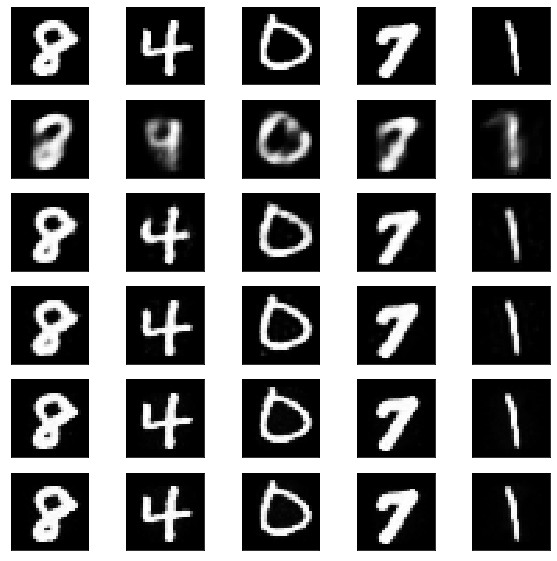

In [59]:
from matplotlib import pyplot as plt
import random

fig, axes = plt.subplots(6, 5, figsize=(10,10))
random_imgs = random.sample(range(output_01.shape[0]), 5)
outputs = [x_test, output_01, output_02, output_03, output_04, output_05]

for row_num, row in enumerate(axes) :
    for col_num, ax in enumerate(row) :
        ax.imshow(outputs[row_num][random_imgs[col_num]].reshape(28,28), cmap='gray')
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])

plt.show()

In [ ]:
# 95% 대인 50부터는 사실상 눈으로는 별 차이없게 나오는 것을 볼 수 있음